In [1]:
import requests
import os
import concurrent.futures
import time

# Define the folder where author images are stored
SAVE_DIR = r"C:\xampp\htdocs\Booksy\author_images"
os.makedirs(SAVE_DIR, exist_ok=True)

# Get all existing images in the folder
existing_images = set(os.listdir(SAVE_DIR))
existing_count = len(existing_images)

# Total required images
TOTAL_IMAGES = 430  
MISSING_IMAGES = TOTAL_IMAGES - existing_count

if MISSING_IMAGES <= 0:
    print(f"✅ You already have {TOTAL_IMAGES} images. No need to download more.")
    exit()

print(f"📌 Found {existing_count} images. Downloading {MISSING_IMAGES} more...\n")

# API Key (Replace with your own from Generated Photos)
API_KEY = "your_api_key_here"

# Function to download an image
def download_image(index):
    filename = f"author{index}.jpg"
    file_path = os.path.join(SAVE_DIR, filename)

    # Skip download if file already exists
    if filename in existing_images:
        print(f"✅ {filename} already exists. Skipping...")
        return

    image_url = f"https://api.generated.photos/api/v1/faces?api_key={API_KEY}"

    try:
        response = requests.get(image_url, timeout=10)
        if response.status_code == 200:
            with open(file_path, 'wb') as file:
                file.write(response.content)
            print(f"✅ Downloaded: {filename}")
        else:
            print(f"❌ Failed to download {filename} (Status Code: {response.status_code})")
    except requests.exceptions.RequestException as e:
        print(f"⚠️ Error downloading {filename}: {e}")

    time.sleep(2)  # Wait between requests to avoid rate-limiting

# Use ThreadPoolExecutor for parallel downloads (40 threads)
start_index = existing_count + 1
end_index = start_index + MISSING_IMAGES

with concurrent.futures.ThreadPoolExecutor(max_workers=40) as executor:
    executor.map(download_image, range(start_index, end_index))

print("\n🎉 All missing author images downloaded!")


📌 Found 261 images. Downloading 169 more...

✅ author262.jpg already exists. Skipping...
✅ author264.jpg already exists. Skipping...
✅ author265.jpg already exists. Skipping...
✅ author266.jpg already exists. Skipping...
✅ author267.jpg already exists. Skipping...
✅ author268.jpg already exists. Skipping...
✅ author269.jpg already exists. Skipping...
✅ author270.jpg already exists. Skipping...
✅ author271.jpg already exists. Skipping...
✅ author272.jpg already exists. Skipping...
✅ author274.jpg already exists. Skipping...
✅ author275.jpg already exists. Skipping...
✅ author276.jpg already exists. Skipping...
✅ author277.jpg already exists. Skipping...
✅ author278.jpg already exists. Skipping...
✅ author280.jpg already exists. Skipping...
✅ author281.jpg already exists. Skipping...
✅ author282.jpg already exists. Skipping...
✅ author286.jpg already exists. Skipping...
✅ author287.jpg already exists. Skipping...
✅ author288.jpg already exists. Skipping...
✅ author289.jpg already exists.

In [3]:
pip install selenium beautifulsoup4 requests pillow webdriver-manager


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.4 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.4 MB 8.5 MB/s eta 0:00:01
   --------------- ------------------------ 3.7/9.4 MB 11.5 MB/s eta 0:00:01
   ------------------------- -------------- 6.0/9.4 MB 11.2 MB/s eta 0:00:01
   ---------------------------------- ----- 8.1/9.4 MB 11.0 MB/s eta 0:00:01
   ---------------------------------------- 9.4/9.4 MB 10.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


🔍 Searching Google Images...
✅ author1.jpg already exists. Skipping...
✅ author4.jpg already exists. Skipping...
❌ Skipping invalid URL: 
❌ Skipping invalid URL: 
❌ Skipping invalid URL: 
❌ Skipping invalid URL: 
❌ Skipping invalid URL: 
❌ Skipping invalid URL: 
❌ Skipping invalid URL: 
❌ Skipping invalid URL: 
❌ Skipping invalid URL: 
❌ Skipping invalid URL: 
❌ Skipping invalid URL: 
❌ Skipping invalid URL: 
❌ Skipping invalid URL: 
❌ Skipping invalid URL: 
❌ Skipping invalid URL: 
❌ Skipping invalid URL: 
❌ Skipping invalid URL: 
❌ Skipping invalid URL: 
❌ Skipping invalid URL: 
❌ Skipping invalid URL: 
❌ Skipping invalid URL: 
❌ Skipping invalid URL: 
❌ Skipping invalid URL: 
❌ Skipping invalid URL: 
❌ Skipping invalid URL: 
❌ Skipping invalid URL: 
❌ Skipping invalid URL: 
❌ Skipping invalid URL: 
❌ Skipping invalid URL: 
❌ Skipping invalid URL: 
❌ Skipping invalid URL: 
❌ Skipping invalid URL: 
❌ Skipping invalid URL: 
❌ Skipping invalid URL: 
❌ Skipping invalid URL: 
❌ Skipping i
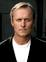
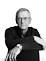
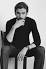
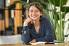
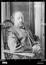
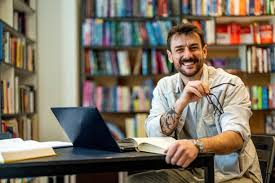
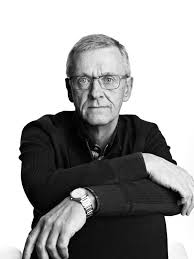
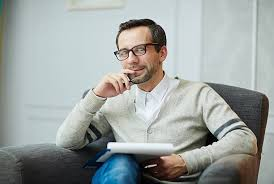
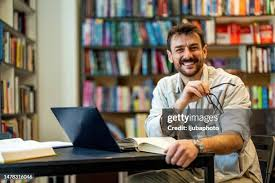
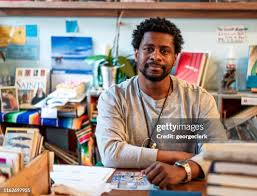
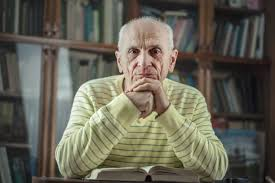
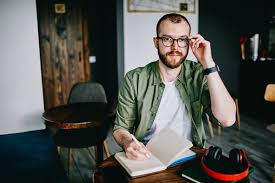
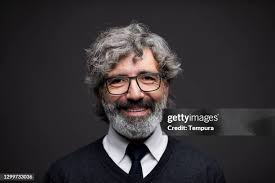
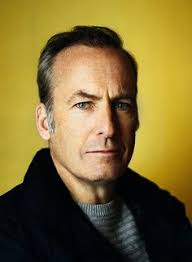
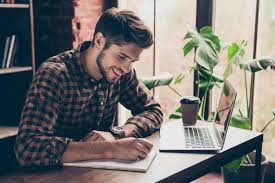
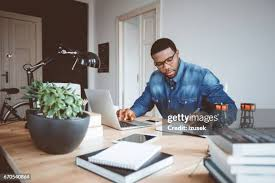
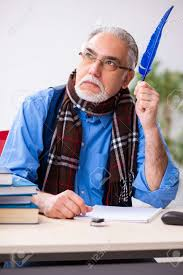
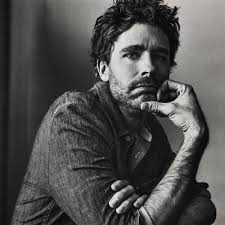
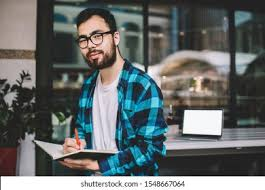
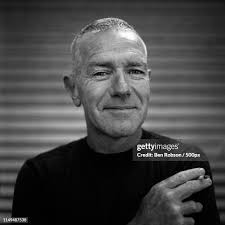
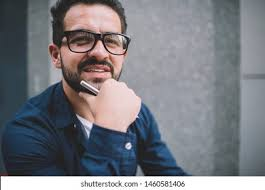
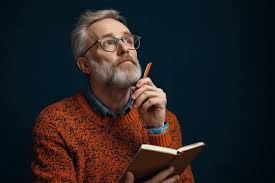
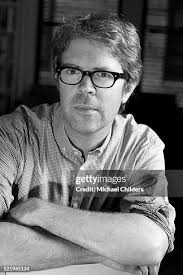
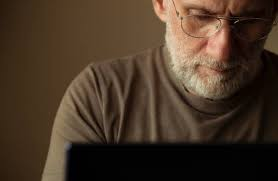
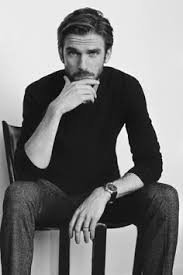
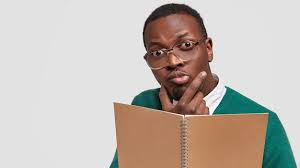
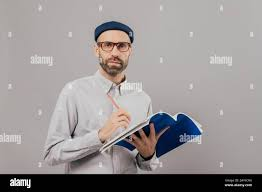
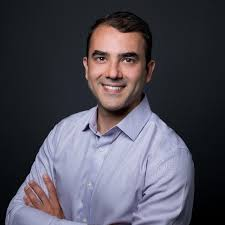
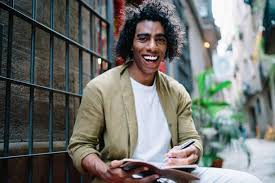
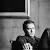
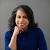
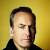
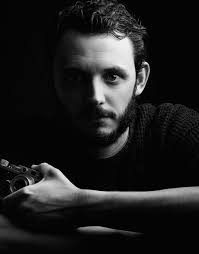
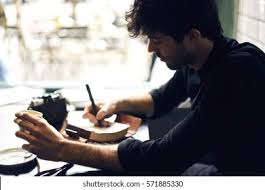
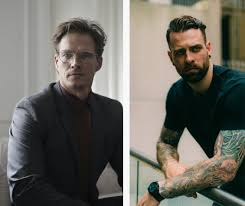
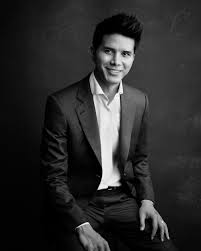
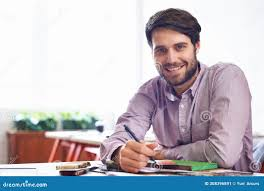

In [1]:
import os
import time
import requests
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from concurrent.futures import ThreadPoolExecutor

# --- Configurations ---
SAVE_DIR = r"C:\xampp\htdocs\Booksy\author_images"
SEARCH_QUERY = "male author portrait"
NUM_IMAGES = 82  # Set how many images to download

# Ensure the save directory exists
os.makedirs(SAVE_DIR, exist_ok=True)

# Set up Chrome WebDriver
chrome_options = Options()
chrome_options.add_argument("--headless")  # Run in background
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--window-size=1920x1080")

service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=chrome_options)

# Function to search Google Images
def get_image_links():
    print("🔍 Searching Google Images...")
    driver.get(f"https://www.google.com/search?tbm=isch&q={SEARCH_QUERY.replace(' ', '+')}")

    time.sleep(3)  # Wait for images to load
    image_elements = driver.find_elements(By.CSS_SELECTOR, "img")
    image_urls = [img.get_attribute("src") for img in image_elements if img.get_attribute("src")]

    driver.quit()  # Close browser after getting images

    return image_urls[:NUM_IMAGES]

# Function to download an image
def download_image(index, url):
    if not url or not url.startswith("http"):
        print(f"❌ Skipping invalid URL: {url}")
        return

    filename = f"author{index + 1}.jpg"
    file_path = os.path.join(SAVE_DIR, filename)

    # Skip if already downloaded
    if os.path.exists(file_path):
        print(f"✅ {filename} already exists. Skipping...")
        return

    try:
        response = requests.get(url, stream=True, timeout=10)
        if response.status_code == 200:
            with open(file_path, "wb") as file:
                for chunk in response.iter_content(1024):
                    file.write(chunk)
            print(f"✅ Downloaded: {filename}")
        else:
            print(f"❌ Failed to download {filename} (Status Code: {response.status_code})")
    except Exception as e:
        print(f"⚠️ Error downloading {filename}: {e}")

# Get image links
image_links = get_image_links()

# Download images using multiple threads
with ThreadPoolExecutor(max_workers=20) as executor:
    executor.map(lambda args: download_image(*args), enumerate(image_links))

print("\n🎉 All missing author images downloaded!")


In [ ]:
import os
import time
import requests
from concurrent.futures import ThreadPoolExecutor

# Set the folder where images are stored
SAVE_DIR = r"C:\xampp\htdocs\Booksy\author_images"
os.makedirs(SAVE_DIR, exist_ok=True)

# Get existing images count
existing_images = [f for f in os.listdir(SAVE_DIR) if f.startswith("author") and f.endswith(".jpg")]
existing_count = len(existing_images)

# Target number of images
TOTAL_IMAGES = 430
remaining_images = TOTAL_IMAGES - existing_count

if remaining_images <= 0:
    print("✅ All author images are already downloaded!")
    exit()

print(f"📢 Need to download {remaining_images} more images...")

# Function to download an image
def download_image(index):
    url = "https://thispersondoesnotexist.com/image"
    filename = f"author{existing_count + index + 1}.jpg"
    file_path = os.path.join(SAVE_DIR, filename)

    for attempt in range(3):  # Retry up to 3 times if failed
        try:
            response = requests.get(url, stream=True, timeout=10)
            if response.status_code == 200:
                with open(file_path, "wb") as file:
                    for chunk in response.iter_content(1024):
                        file.write(chunk)
                print(f"✅ Downloaded: {filename}")
                return
            else:
                print(f"❌ Failed to download {filename} (Status Code: {response.status_code})")
        except Exception as e:
            print(f"⚠️ Error downloading {filename}: {e}")

        time.sleep(2)  # Wait before retrying

    print(f"🚫 Skipped {filename} after 3 failed attempts.")

# Use multi-threading to download images faster
with ThreadPoolExecutor(max_workers=40) as executor:
    executor.map(download_image, range(remaining_images))

print("\n🎉 All missing author images downloaded successfully!")


📢 Need to download 166 more images...
❌ Failed to download author267.jpg (Status Code: 404)
❌ Failed to download author290.jpg (Status Code: 404)
❌ Failed to download author270.jpg (Status Code: 404)
❌ Failed to download author268.jpg (Status Code: 404)
❌ Failed to download author281.jpg (Status Code: 404)
❌ Failed to download author297.jpg (Status Code: 404)
❌ Failed to download author271.jpg (Status Code: 404)
❌ Failed to download author272.jpg (Status Code: 404)
❌ Failed to download author265.jpg (Status Code: 404)
❌ Failed to download author276.jpg (Status Code: 404)
❌ Failed to download author278.jpg (Status Code: 404)
❌ Failed to download author279.jpg (Status Code: 404)
❌ Failed to download author280.jpg (Status Code: 404)
❌ Failed to download author275.jpg (Status Code: 404)
❌ Failed to download author269.jpg (Status Code: 404)
❌ Failed to download author285.jpg (Status Code: 404)
❌ Failed to download author277.jpg (Status Code: 404)
❌ Failed to download author266.jpg (Status C

In [1]:
import os
import requests

# Website URL (Generates a new face each time)
image_url = "https://thispersondoesnotexist.com"

# Directory to save images
save_dir = "ai_generated_faces"
os.makedirs(save_dir, exist_ok=True)

# Number of images to download
num_images = 82  # Change this to how many images you need

# Download images
for i in range(1, num_images + 1):
    try:
        response = requests.get(image_url, stream=True)
        image_path = os.path.join(save_dir, f"face_{i}.jpg")

        with open(image_path, "wb") as file:
            for chunk in response.iter_content(1024):
                file.write(chunk)

        print(f"Downloaded {image_path}")

    except Exception as e:
        print(f"Failed to download image {i}: {e}")


Downloaded ai_generated_faces\face_1.jpg
Downloaded ai_generated_faces\face_2.jpg
Downloaded ai_generated_faces\face_3.jpg
Downloaded ai_generated_faces\face_4.jpg
Downloaded ai_generated_faces\face_5.jpg
Downloaded ai_generated_faces\face_6.jpg
Downloaded ai_generated_faces\face_7.jpg
Downloaded ai_generated_faces\face_8.jpg
Downloaded ai_generated_faces\face_9.jpg
Downloaded ai_generated_faces\face_10.jpg
Downloaded ai_generated_faces\face_11.jpg
Downloaded ai_generated_faces\face_12.jpg
Downloaded ai_generated_faces\face_13.jpg
Downloaded ai_generated_faces\face_14.jpg
Downloaded ai_generated_faces\face_15.jpg
Downloaded ai_generated_faces\face_16.jpg
Downloaded ai_generated_faces\face_17.jpg
Downloaded ai_generated_faces\face_18.jpg
Downloaded ai_generated_faces\face_19.jpg
Downloaded ai_generated_faces\face_20.jpg
Downloaded ai_generated_faces\face_21.jpg
Downloaded ai_generated_faces\face_22.jpg
Downloaded ai_generated_faces\face_23.jpg
Downloaded ai_generated_faces\face_24.jpg
D

In [2]:
import os

# Directory containing images
directory = r"C:\xampp\htdocs\Booksy\author_images"  # Change this to your folder name

# Get all image files and sort them
image_files = sorted(os.listdir(directory))

# Rename all files to a consistent format
for i, filename in enumerate(image_files, start=1):
    old_path = os.path.join(directory, filename)
    new_filename = f"author_{i}.jpg"  # Change "author_" to "face_" if preferred
    new_path = os.path.join(directory, new_filename)
    
    os.rename(old_path, new_path)
    print(f"Renamed {filename} → {new_filename}")

Renamed author1.jpg → author_1.jpg
Renamed author100.jpg → author_2.jpg
Renamed author103.jpg → author_3.jpg
Renamed author104.jpg → author_4.jpg
Renamed author105.jpg → author_5.jpg
Renamed author106.jpg → author_6.jpg
Renamed author107.jpg → author_7.jpg
Renamed author108.jpg → author_8.jpg
Renamed author109.jpg → author_9.jpg
Renamed author11.jpg → author_10.jpg
Renamed author110.jpg → author_11.jpg
Renamed author111.jpg → author_12.jpg
Renamed author112.jpg → author_13.jpg
Renamed author113.jpg → author_14.jpg
Renamed author114.jpg → author_15.jpg
Renamed author115.jpg → author_16.jpg
Renamed author116.jpg → author_17.jpg
Renamed author117.jpg → author_18.jpg
Renamed author118.jpg → author_19.jpg
Renamed author119.jpg → author_20.jpg
Renamed author12.jpg → author_21.jpg
Renamed author120.jpg → author_22.jpg
Renamed author121.jpg → author_23.jpg
Renamed author122.jpg → author_24.jpg
Renamed author123.jpg → author_25.jpg
Renamed author124.jpg → author_26.jpg
Renamed author125.jpg → a

In [3]:
import os
import requests

# Directory containing images
directory = r"C:\xampp\htdocs\Booksy\author_images"
os.makedirs(directory, exist_ok=True)

# Count existing images
existing_images = len(os.listdir(directory))
target_images = 430  # Total images needed
missing_images = target_images - existing_images

# Download additional images if needed
if missing_images > 0:
    print(f"Downloading {missing_images} more images...")

    image_url = "https://thispersondoesnotexist.com"
    
    for i in range(existing_images + 1, target_images + 1):
        try:
            response = requests.get(image_url, stream=True)
            image_path = os.path.join(directory, f"author_{i}.jpg")

            with open(image_path, "wb") as file:
                for chunk in response.iter_content(1024):
                    file.write(chunk)

            print(f"Downloaded {image_path}")

        except Exception as e:
            print(f"Failed to download image {i}: {e}")

print("All images are now renamed and complete.")


Downloaded C:\xampp\htdocs\Booksy\author_images\author_343.jpg
Downloaded C:\xampp\htdocs\Booksy\author_images\author_344.jpg
Downloaded C:\xampp\htdocs\Booksy\author_images\author_345.jpg
Downloaded C:\xampp\htdocs\Booksy\author_images\author_346.jpg
Downloaded C:\xampp\htdocs\Booksy\author_images\author_347.jpg
Downloaded C:\xampp\htdocs\Booksy\author_images\author_348.jpg
Downloaded C:\xampp\htdocs\Booksy\author_images\author_349.jpg
Downloaded C:\xampp\htdocs\Booksy\author_images\author_350.jpg
Downloaded C:\xampp\htdocs\Booksy\author_images\author_351.jpg
Downloaded C:\xampp\htdocs\Booksy\author_images\author_352.jpg
Downloaded C:\xampp\htdocs\Booksy\author_images\author_353.jpg
Downloaded C:\xampp\htdocs\Booksy\author_images\author_354.jpg
Downloaded C:\xampp\htdocs\Booksy\author_images\author_355.jpg
Downloaded C:\xampp\htdocs\Booksy\author_images\author_356.jpg
Downloaded C:\xampp\htdocs\Booksy\author_images\author_357.jpg
Downloaded C:\xampp\htdocs\Booksy\author_images\author_